# Topic Modeling Project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.lda_model
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Topic_Modeling/bbc-text.csv')

print(df.shape)
print(df.head())
print(df['category'].value_counts())


(2225, 2)
        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...
category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


# Basic Text Preprocessing

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    tokens = [lemmatizer.lemmatize(word) for word in text.split()
              if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Vectorization

In [ ]:
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])


# Apply LDA

In [ ]:
n_topics = 5

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

# Inspect Topics

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ",
              [feature_names[i] for i in topic.argsort()[-no_top_words:]])

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)


Topic 0:  ['sale', 'technology', 'mobile', 'new', 'firm', 'market', 'people', 'company', 'year', 'said']
Topic 1:  ['yukos', 'program', 'security', 'email', 'firm', 'computer', 'net', 'software', 'user', 'said']
Topic 2:  ['england', 'club', 'play', 'world', 'time', 'win', 'year', 'player', 'said', 'game']
Topic 3:  ['song', 'director', 'new', 'star', 'music', 'award', 'best', 'year', 'said', 'film']
Topic 4:  ['tory', 'blair', 'say', 'minister', 'election', 'people', 'party', 'labour', 'government', 'said']


# Visualize with pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
panel

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.089489 -0.095105       1        1  31.319855
4     -0.021260 -0.146324       2        1  24.695863
2     -0.103952  0.123867       3        1  18.673790
3     -0.140707  0.007775       4        1  16.847042
1      0.176431  0.109788       5        1   8.463451, topic_info=             Term         Freq        Total Category  logprob  loglift
5161         film  1053.000000  1053.000000  Default  30.0000  30.0000
5636         game  1423.000000  1423.000000  Default  29.0000  29.0000
7692       labour   777.000000   777.000000  Default  28.0000  28.0000
5917   government  1161.000000  1161.000000  Default  27.0000  27.0000
5209         firm   966.000000   966.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
15047     website   105.658964   341.503653   Topic5  -5.7893   1.2963
7862        legal   100.031476   272.644775   Topic5  -5.8440   1.4667
10040      people   130.806924  1980.030442   Topic5  -5.5758  -0.2477
9228          new   128.758316  1902.891413   Topic5  -5.5915  -0.2238
14667         use   107.263768   560.712863   Topic5  -5.7742   0.8155

[379 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
93         1  0.735215        according
93         2  0.094945        according
93         3  0.014607        according
93         4  0.124159        according
93         5  0.029214        according
...      ...       ...              ...
15381      5  0.003521          yearold
15411      5  0.983278          yugansk
15412      5  0.986161  yuganskneftegas
15415      1  0.005547            yukos
15415      5  0.992965            yukos

[827 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 4, 2])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


# Prepare for LDA

## Compute Perplexity & Coherence for Multiple Topic Numbers

In [ ]:
texts = [doc.split() for doc in df['clean_text']]  # tokenized docs
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def evaluate_lda(n_topics, X, vectorizer):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Compute perplexity
    perplexity = lda.perplexity(X)

    # Compute coherence
    topics = []
    for topic in lda.components_:
        top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
        topics.append(top_words)

    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    return perplexity, coherence

results = {}
for n in range(3, 11):
    p, c = evaluate_lda(n, X, vectorizer)
    results[n] = (p, c)
    print(f"Topics={n} | Perplexity={p:.2f} | Coherence={c:.4f}")


## Visualize Results

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

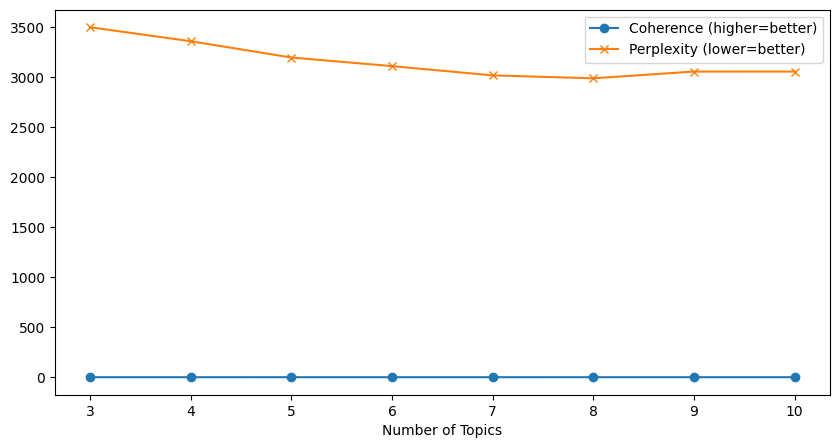

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
topics = list(results.keys())
perplexities = [results[k][0] for k in topics]
coherences = [results[k][1] for k in topics]

plt.figure(figsize=(10,5))
plt.plot(topics, coherences, marker='o', label='Coherence (higher=better)')
plt.plot(topics, perplexities, marker='x', label='Perplexity (lower=better)')
plt.xlabel("Number of Topics")
plt.legend()
plt.show()


# Finalize LDA Model with k=7

In [ ]:
best_k = 7
lda_final = LatentDirichletAllocation(n_components=best_k, random_state=42)
lda_final.fit(X)

# Display final topics
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}: ", [feature_names[i] for i in topic.argsort()[-no_top_words:]])

display_topics(lda_final, feature_names, 15)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

Topic 0:  ['country', 'month', 'rate', 'new', 'economy', 'growth', 'share', 'price', 'sale', 'bank', 'market', 'firm', 'company', 'year', 'said']
Topic 1:  ['player', 'italy', 'robinson', 'game', 'scotland', 'security', 'try', 'nation', 'virus', 'said', 'france', 'rugby', 'wale', 'ireland', 'england']
Topic 2:  ['new', 'think', 'good', 'team', 'match', 'world', 'cup', 'year', 'win', 'play', 'time', 'club', 'player', 'said', 'game']
Topic 3:  ['british', 'album', 'number', 'song', 'director', 'band', 'new', 'actor', 'star', 'music', 'said', 'award', 'year', 'best', 'film']
Topic 4:  ['men', 'indoor', 'time', 'mark', 'roddick', 'british', 'olympic', 'record', 'race', 'second', 'european', 'year', 'set', 'world', 'said']
Topic 5:  ['tax', 'told', 'brown', 'new', 'plan', 'tory', 'blair', 'say', 'minister', 'election', 'party', 'people', 'labour', 'government', 'said']
Topic 6:  ['net', 'year', 'use', 'digital', 'computer', 'music', 'user', 'new', 'service', 'game', 'phone', 'mobile', 'tech

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
doc_topic_dist = lda_final.transform(X)
df['LDA_topic'] = np.argmax(doc_topic_dist, axis=1)
df[['category', 'LDA_topic']].head(10)

,category,LDA_topic
0,tech,6
1,business,2
2,sport,2
3,sport,2
4,entertainment,3
5,politics,5
6,politics,5
7,sport,2
8,sport,1
9,entertainment,3


from matplotlib import pyplot as plt
_df_0['LDA_topic'].plot(kind='hist', bins=20, title='LDA_topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['LDA_topic'].plot(kind='line', figsize=(8, 4), title='LDA_topic')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='LDA_topic', y='category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Extra

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)


In [ ]:
doc_topic_dist = lda_final.transform(X)
df['predicted_topic'] = doc_topic_dist.argmax(axis=1)
topic_to_label = df.groupby('predicted_topic')['category'].agg(lambda x: x.mode()[0]).to_dict()

print("Topic to Label Mapping:")
for t, lbl in topic_to_label.items():
    print(f"Topic {t} → {lbl}")

Topic to Label Mapping:
Topic 0 → business
Topic 1 → sport
Topic 2 → sport
Topic 3 → entertainment
Topic 4 → sport
Topic 5 → politics
Topic 6 → tech


In [ ]:
def classify_text(input_text):
    cleaned = preprocess_text(input_text)
    vectorized = vectorizer.transform([cleaned])

    topic_dist = lda_final.transform(vectorized)[0]

    best_topic = np.argmax(topic_dist)
    best_label = topic_to_label[best_topic]

    print("\n--- Topic Scores ---")
    for topic_idx, score in enumerate(topic_dist):
        print(f"Topic {topic_idx} ({topic_to_label[topic_idx]}): {score:.4f}")

    print("\n Predicted Category:", best_label)

In [ ]:
while True:
    text = input("\nEnter text (or type 'exit'): ")
    if text.lower() == 'exit':
        break
    classify_text(text)



Enter text (or type 'exit'): Manchester United secured a thrilling 3–2 victory over Liverpool in the Premier League last night. The winning goal came in the final minutes, sending fans into a frenzy. The team’s coach praised the players’ determination and teamwork

--- Topic Scores ---
Topic 0 (business): 0.0060
Topic 1 (sport): 0.0706
Topic 2 (sport): 0.8996
Topic 3 (entertainment): 0.0060
Topic 4 (sport): 0.0060
Topic 5 (politics): 0.0060
Topic 6 (tech): 0.0060

 Predicted Category: sport

Enter text (or type 'exit'): exit
